## The Life Expectancy and Income
_by Mohammad Fazlan bin Harun_

About the dataset:

Data source : https://databank.worldbank.org/source/world-development-indicators

Database: World Development Indicators  
Countries: check all "Countries" (not All or Aggregates)  
Series: Life expectancy at birth, total (years) [SP.DYN.LE00.IN]    
          Population, total [SP.POP.TOTL]    
        GDP per capita, PPP (current international $)(NY.GDP.PCAP.PP.CD)      
Time:   check all years

layout > orientation > popular > Orientation 4 ( Series on page, Time on Column, Country on Row)

Life expectancy at birth, total (years)   
-indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.  
-life expectancy at birth used here is the average number of years a newborn is expected to live if mortality patterns at the time of its birth remain constant in the future. It reflects the overall mortality level of a population, and summarizes the mortality pattern that prevails across all age groups in a given year.

Population   
-total is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship. The values shown are mid-year estimates.	

GDP per capita, PPP (current international $)	
-this indicator provides per capita values for gross domestic product (GDP) expressed in current international dollars converted by purchasing power parity (PPP) conversion factor. 
GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pprint as pp

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False,
world_readable=True)

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

In [2]:
#loading data

data = pd.read_csv('Data_WB_Life_Expectancy.csv')
data.head(10)

,Time,Time Code,Country Name,Country Code,"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]","Population, total [SP.POP.TOTL]","GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]"
0,1960,YR1960,Afghanistan,AFG,32.446,8996967,..
1,1960,YR1960,Albania,ALB,62.283,1608800,..
2,1960,YR1960,Algeria,DZA,46.141,11057864,..
3,1960,YR1960,American Samoa,ASM,..,20127,..
4,1960,YR1960,Andorra,AND,..,13410,..
5,1960,YR1960,Angola,AGO,37.524,5454938,..
6,1960,YR1960,Antigua and Barbuda,ATG,61.968,54132,..
7,1960,YR1960,Argentina,ARG,65.055,20481781,..
8,1960,YR1960,Armenia,ARM,65.972,1874119,..
9,1960,YR1960,Aruba,ABW,65.662,54208,..


We can see the GDP per capita column has a null values which we should handle later on.

In [3]:
print('List of columns :')
data.columns.to_list()

List of columns :


['Time',
 'Time Code',
 'Country Name',
 'Country Code',
 'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
 'Population, total [SP.POP.TOTL]',
 'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]']

In [4]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in this dataset.')

There are 13454 rows and 7 columns in this dataset.


In [5]:
#renaming column 

data.rename(
    columns={
        'Time':'Year',
        'GDP per capita, PPP (current international $) [NY.GDP.PCAP.PP.CD]':'GDP_per_capita',
        'Population, total [SP.POP.TOTL]':'Population',
        'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]':'Life_expectancy'
    },inplace=True)

data.head(2)

,Year,Time Code,Country Name,Country Code,Life_expectancy,Population,GDP_per_capita
0,1960,YR1960,Afghanistan,AFG,32.446,8996967,..
1,1960,YR1960,Albania,ALB,62.283,1608800,..


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13454 entries, 0 to 13453
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             13454 non-null  int64 
 1   Time Code        13454 non-null  object
 2   Country Name     13454 non-null  object
 3   Country Code     13454 non-null  object
 4   Life_expectancy  13454 non-null  object
 5   Population       13454 non-null  object
 6   GDP_per_capita   13454 non-null  object
dtypes: int64(1), object(6)
memory usage: 735.9+ KB


The life expectancy, population and GDP per capita column should have a numeric type of data instead of object. We need to change it to numeric data type later.

In [7]:
#check for missing values

data.isna().sum()

Year               0
Time Code          0
Country Name       0
Country Code       0
Life_expectancy    0
Population         0
GDP_per_capita     0
dtype: int64

It is weird to see no missing values when we certainly know GDP per capita column has a missing values maybe the mising values is denotd by '..' ,let's check.

In [8]:
((data['GDP_per_capita'])=='..').sum()

7684

In [9]:
(data=='..').sum()

Year                  0
Time Code             0
Country Name          0
Country Code          0
Life_expectancy    1524
Population          259
GDP_per_capita     7684
dtype: int64

In [10]:
#now we know missing values is represented by '..', let delete them.

data= data.replace("..", np.nan)
(data=='..').sum()

Year               0
Time Code          0
Country Name       0
Country Code       0
Life_expectancy    0
Population         0
GDP_per_capita     0
dtype: int64

In [11]:
#change object datatype to numeric

data= data.assign(
    Population = pd.to_numeric(data.Population),
    GDP_per_capita = pd.to_numeric(data.GDP_per_capita),
    Life_expectancy = pd.to_numeric(data.Life_expectancy)
)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13454 entries, 0 to 13453
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             13454 non-null  int64  
 1   Time Code        13454 non-null  object 
 2   Country Name     13454 non-null  object 
 3   Country Code     13454 non-null  object 
 4   Life_expectancy  11930 non-null  float64
 5   Population       13195 non-null  float64
 6   GDP_per_capita   5770 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 735.9+ KB
None


In [12]:
data.isnull().sum()

Year                  0
Time Code             0
Country Name          0
Country Code          0
Life_expectancy    1524
Population          259
GDP_per_capita     7684
dtype: int64

In [13]:
data.dropna(inplace=True)
data.isnull().sum()

Year               0
Time Code          0
Country Name       0
Country Code       0
Life_expectancy    0
Population         0
GDP_per_capita     0
dtype: int64

In [14]:
data['Population (million)'] = round(data['Population']/1000000,2)
data['GDP_per_capita (thousand)'] = round(data['GDP_per_capita']/1000,2)
data['Life_expectancy'] = round((data['Life_expectancy']),0)
data.drop(columns=['GDP_per_capita','Population','Time Code'],inplace=True)
data.set_index('Country Code',inplace = True)
data.head()

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand)
Country Code,,,,,
ALB,1990,Albania,72.0,3.29,2.55
DZA,1990,Algeria,67.0,25.76,6.91
AGO,1990,Angola,45.0,11.85,3.28
ATG,1990,Antigua and Barbuda,72.0,0.06,11.59
ARG,1990,Argentina,72.0,32.62,7.19


In [15]:
# let select latest year data to analyze

df = data[(data['Year'] == 2017)]
df.head()

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand)
Country Code,,,,,
AFG,2017,Afghanistan,64.0,36.30,2.06
ALB,2017,Albania,78.0,2.87,12.77
DZA,2017,Algeria,76.0,41.39,11.74
AGO,2017,Angola,60.0,29.82,7.31
ATG,2017,Antigua and Barbuda,77.0,0.10,19.84


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, AFG to ZWE
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       184 non-null    int64  
 1   Country Name               184 non-null    object 
 2   Life_expectancy            184 non-null    float64
 3   Population (million)       184 non-null    float64
 4   GDP_per_capita (thousand)  184 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.6+ KB


In [17]:
# Data transformed by taking the natural logarithm, differences in natural logs show percentage differences.
df["log_gdp"] = round(np.log(df["GDP_per_capita (thousand)"]),2)
df.head(10)

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
Country Code,,,,,,
AFG,2017,Afghanistan,64.0,36.30,2.06,0.72
ALB,2017,Albania,78.0,2.87,12.77,2.55
DZA,2017,Algeria,76.0,41.39,11.74,2.46
AGO,2017,Angola,60.0,29.82,7.31,1.99
ATG,2017,Antigua and Barbuda,77.0,0.10,19.84,2.99
ARG,2017,Argentina,76.0,44.04,23.60,3.16
ARM,2017,Armenia,75.0,2.94,12.12,2.49
ABW,2017,Aruba,76.0,0.11,38.90,3.66
AUS,2017,Australia,82.0,24.60,48.40,3.88


In [18]:
#let see descriptive statistics of the dataset

round(df.describe(),2)

,Year,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
count,184.0,184.00,184.00,184.00,184.00
mean,2017.0,72.34,40.04,21.16,2.48
std,0.0,7.67,147.12,22.24,1.17
min,2017.0,52.00,0.06,0.77,-0.26
25%,2017.0,67.00,2.08,4.77,1.56
50%,2017.0,74.00,8.44,13.34,2.59
75%,2017.0,78.00,28.77,30.06,3.40
max,2017.0,85.00,1396.22,126.14,4.84


In [19]:
life_expectancy_Malaysia2020 = df[(df['Country Name'] == 'Malaysia')]
life_expectancy_Malaysia2020

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
Country Code,,,,,,
MYS,2017,Malaysia,76.0,31.1,26.66,3.28


<div class="alert alert-block alert-info">
    <b>Average life expectancy across the 181 countries in 2020 is 73 years, with a range of 54 to 85 years old. Thus, there is substantial variation in the average length of life across countries. For a comparison to Malaysia (my country), Malaysia is at the upper half of the range where Malaysian residents expected to live around 76-years-old.</b>
    </div>
    

In [20]:
sorted_by_life_expectancy = df.sort_values(by=['Life_expectancy'])

print('Countries with the lowest life expectancy are from :')
(sorted_by_life_expectancy [['Country Name','Life_expectancy']]).head()

Countries with the lowest life expectancy are from :


,Country Name,Life_expectancy
Country Code,,
CAF,Central African Republic,52.0
LSO,Lesotho,53.0
TCD,Chad,54.0
SLE,Sierra Leone,54.0
NGA,Nigeria,54.0


In [21]:
print('''Countries with the highest life expectancy are from East Asian countries and South East Asian (Singapore)''')
sorted_by_life_expectancy [['Country Name','Life_expectancy']].tail()

Countries with the highest life expectancy are from East Asian countries and South East Asian (Singapore)


,Country Name,Life_expectancy
Country Code,,
SGP,Singapore,83.0
CHE,Switzerland,84.0
MAC,"Macao SAR, China",84.0
JPN,Japan,84.0
HKG,"Hong Kong SAR, China",85.0


### Figure 1: The distribution of GDP per capita

(a) Histogram of GDP per capita

Text(0, 0.5, 'Frequency')

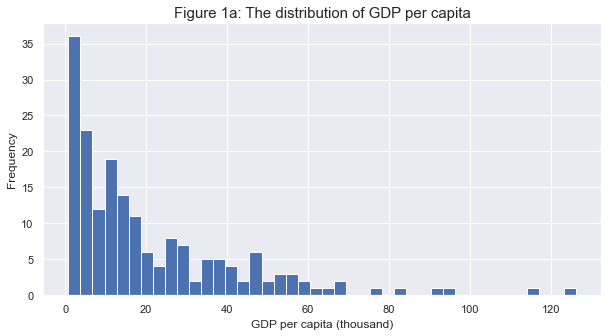

In [22]:
df['GDP_per_capita (thousand)'].hist(figsize=(10,5),bins=42,)
plt.title("Figure 1a: The distribution of GDP per capita", fontsize=15) 
plt.xlabel("GDP per capita (thousand)", fontsize=12) 
plt.ylabel("Frequency", fontsize=12)  

<div class="alert alert-block alert-info">
    <b>The distribution of GDP per capita is skewed with a long right tail, Figure 1a shows its histogram. There are 6 countries with extremely high GDP per capita values. Let's see which countries are they.
</b>
    </div>

In [23]:
sorted_by_gdppc = df.sort_values(by=['GDP_per_capita (thousand)'],ascending=False)
sorted_by_gdppc.head(6)

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
Country Code,,,,,,
MAC,2017,"Macao SAR, China",84.0,0.62,126.14,4.84
LUX,2017,Luxembourg,82.0,0.60,114.99,4.74
SGP,2017,Singapore,83.0,5.61,95.35,4.56
QAT,2017,Qatar,80.0,2.72,91.74,4.52
BMU,2017,Bermuda,81.0,0.06,81.83,4.40
IRL,2017,Ireland,82.0,4.81,77.75,4.35



<div class="alert alert-block alert-info">
    <b>There are 6 countries with extremely high GDP per capita: Luxembourg, Singapore, Ireland, Qatar,Bermuda and Switzerland.</b> 
    </div>

In [24]:
round(sorted_by_gdppc.describe(),2)

,Year,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
count,184.0,184.00,184.00,184.00,184.00
mean,2017.0,72.34,40.04,21.16,2.48
std,0.0,7.67,147.12,22.24,1.17
min,2017.0,52.00,0.06,0.77,-0.26
25%,2017.0,67.00,2.08,4.77,1.56
50%,2017.0,74.00,8.44,13.34,2.59
75%,2017.0,78.00,28.77,30.06,3.40
max,2017.0,85.00,1396.22,126.14,4.84


<div class="alert alert-block alert-info">
    <b>Average GDP per capita is 21k US dollars in this data, the median is 13k US dollars, which also shows the skewness of the distribution. The standard deviation is 22k US dollars, suggesting substantial spread.</b> 
    </div>

(b) Histogram of log (GDP per capita)

Text(0, 0.5, 'Frequency')

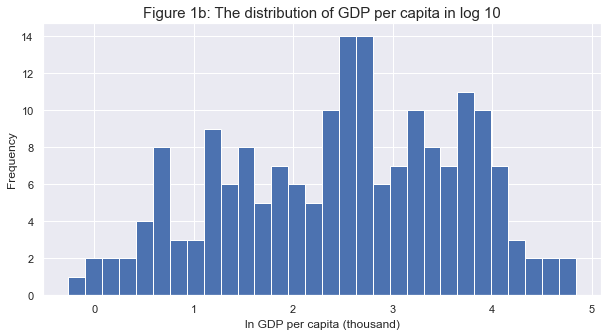

In [25]:
df['log_gdp'].hist(figsize=(10,5),bins=30)
plt.title("Figure 1b: The distribution of GDP per capita in log 10", fontsize=15) 
plt.xlabel("ln GDP per capita (thousand)", fontsize=12) 
plt.ylabel("Frequency", fontsize=12)

<div class="alert alert-block alert-info">
    <b>When we take the natural log of GDP per capita, the distribution is close to symmetric (Figure 1b). There are two countries with less than one thousand dollars of GDP per capita (Burundi and the Central African Republic), their log GDP per capita value is less than zero. The average of log GDP per capita is 2.49 in this data, its median is 2.57, suggesting a fairly symmetric distribution. The standard deviation is 1.15.</b>
    </div>

In [26]:
sorted_by_gdppc.tail()

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp
Country Code,,,,,,
NER,2017,Niger,62.0,21.60,1.16,0.15
SOM,2017,Somalia,57.0,14.59,1.08,0.08
COD,2017,"Congo, Dem. Rep.",60.0,81.40,1.06,0.06
CAF,2017,Central African Republic,52.0,4.60,0.91,-0.09
BDI,2017,Burundi,61.0,10.83,0.77,-0.26


### Figure 2 Life expectancy and GDP per capita

(a) Life expectancy and (GDP per capita)

'The preceding screenshot shows a strong correlation between these two variables. However, there are some outliers that we can easily spot from the graph'

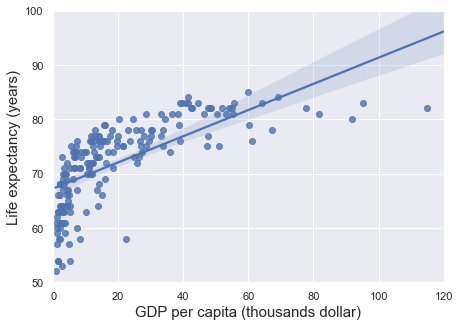

In [27]:
plt.figure(figsize=(7, 5))
sns.regplot(df['GDP_per_capita (thousand)'], df['Life_expectancy'])
plt.xlabel("GDP per capita (thousands dollar)", fontsize=15) 
plt.ylabel("Life expectancy (years)", fontsize=15) 
plt.axis([0, 120, 50, 100])

"The preceding screenshot shows a strong correlation between these two variables. However, there are some outliers that we can easily spot from the graph"

<div class="alert alert-block alert-info">
    <b>Figure 2a shows the results of a linear regression with life expectancy as the y variable, and GDP per capita as the x variable. This regression shows a positive slope, but the scatterplot implies that there are strong nonlinearities in the association that the linear regression doesn’t capture. In particular, the slope appears a lot steeper at lower levels of GDP per capita and a lot flatter at higher levels. Thus, the linear regression does not capture the shape of the pattern, and because of the skewed distribution of the x variable, it is not a very good approximation of the average of that nonlinear pattern either.</b> 
    </div>

(b) Life expectancy and ln (GDP per capita)

(-0.5, 5.0, 50.0, 85.0)

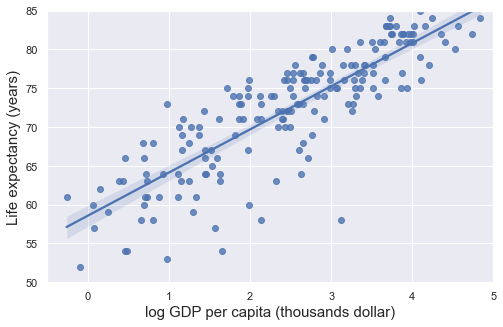

In [28]:
plt.figure(figsize=(8, 5))
sns.regplot(df['log_gdp'],df['Life_expectancy'])
plt.xlabel("log GDP per capita (thousands dollar)", fontsize=15) 
plt.ylabel("Life expectancy (years)", fontsize=15) 
plt.axis([-0.5, 5, 50, 85])

<div class="alert alert-block alert-info">
    <b>Figure 8.5a shows the same regression with the natural log of GDP per capita as the x variable. In contrast with the 
regression without taking logs, the scatterplot with log GDP per capita suggests a remarkably linear pattern.
For most of the range of log GDP per capita, the linear fit appears to be a good approximation
of the conditional expectation.</b>
    </div>

In [40]:
df['regression_line'] =round( 5.56 * (df['log_gdp'])+58.57 ,2)
df['result'] =(round(df['Life_expectancy'] - df['regression_line'],2))
(df['result'])
##df['country_result'] = df['Country Name'] + df['result']
a=df.sort_values(by=['GDP_per_capita (thousand)'],ascending=False)
a

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp,regression_line,result,country_result
Country Code,,,,,,,,,
MAC,2017,"Macao SAR, China",84.0,0.62,126.14,4.84,85.48,-1.48,"Macao SAR, China : -1.48"
LUX,2017,Luxembourg,82.0,0.60,114.99,4.74,84.92,-2.92,Luxembourg : -2.92
SGP,2017,Singapore,83.0,5.61,95.35,4.56,83.92,-0.92,Singapore : -0.92
QAT,2017,Qatar,80.0,2.72,91.74,4.52,83.70,-3.70,Qatar : -3.7
BMU,2017,Bermuda,81.0,0.06,81.83,4.40,83.03,-2.03,Bermuda : -2.03
...,...,...,...,...,...,...,...,...,...
NER,2017,Niger,62.0,21.60,1.16,0.15,59.40,2.60,Niger : 2.6
SOM,2017,Somalia,57.0,14.59,1.08,0.08,59.01,-2.01,Somalia : -2.01
COD,2017,"Congo, Dem. Rep.",60.0,81.40,1.06,0.06,58.90,1.10,"Congo, Dem. Rep. : 1.1"


In [39]:
df.iplot(x='log_gdp',
         y='Life_expectancy',
         text='country_result',
         bestfit=True,
         bestfit_colors=['black'],
         mode='markers',
         title='the relationship between the expected value of y and different values of x',
         xTitle='ln scale GDP per capita (thousands dollar)',
         yTitle='Life expectancy (years)',
         colors = 'blue',
         xrange=[-0.5, 5],
         yrange=[ 50, 90],
         dash='solid',
         interpolation='linear',
         symbol='circle-dot',
         size=8,
         asFrame=True)

lines
                               markers
                               lines+markers
                               lines+text
                               markers+text
                               lines+markers+text

level–log regression: yE = α + β ln x
β: y is β/100 units higher on average for observations having one percent higher x.

One purpose of the exercise is identifying countries where people live especially long or especially
short lives for their average income. With the level–log linear regression, the countries with
the shortest lives given their average income include Equatorial Guinea, Nigeria, and Cote d’Ivoire,
where the average age at death is 18, 15, and 12 years shorter than what we could expect given
their GDP per capita. The countries with the longest lives given their income include Vietnam,
Nicaragua, and Lebanon where the average age at death is a little more than seven years longer
than what we could expect given their GDP per capita. Other interesting results include that lives
are more than two years shorter than expected in the USA, two years longer than expected in
China, and five years longer than expected in Japan. Looking at the richest countries, lives are six
years shorter than expected in Qatar, 0.5 years shorter than expected in Macao and Singapore,
and one year shorter than expected in Luxembourg.
In fact, the eight countries with the highest levels of GDP per capita have lower life expectancy
than predicted by the linear regression. These countries are a mix of city-states (Macao, Singapore),
oil-rich countries (Brunei, United Arab Emirates, Qatar), and well-off small Western European
countries (Ireland, Luxembourg). This may mean that these particular countries have specific reasons
for falling behind what’s expected, maybe including mismeasurement of income due to GDP
accounted for that does not enrich local people. But, maybe, this result shows that we just can’t
expect life expectancy to be proportionately higher with higher (log) GDP per capita among countries
with the highest levels of GDP per capita.

It
shows that countries with a 1 percent higher GDP per capita have life expectancy higher by 0.053
years, on average.

We can conclude, therefore, that the association between life expectancy and average GDP is
best captured with a regression that has log GDP per capita as the x variable. The slope of this
regression is 5.56. This is a level–log regression, so the interpretation of the slope is a bit tricky. It
shows that countries with a 1 percent higher GDP per capita have life expectancy higher by 0.053
years, on average. Note that 1-percent differences in GDP per capita are very small. Recall that the
standard deviation of log GDP per capita is more than 1 so that typical cross-country differences
are in the order of hundred percents not one percents. At the same time, the log approximation
becomes quite bad at such high levels. As a middle ground, let’s interpret the slope coefficient by
looking at 10-percent differences. Countries with a 10 percent higher GDP per capita have a half
(0.53) year higher life expectancy on average.

In [31]:
#!jupyter nbconvert --to html Life_expectancy_and_Income.ipynb

In [32]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [38]:
'''colname_indexes = df['colname'].value_counts().index.tolist()
colname_count= df['colname'].value_counts().values.tolist()	,bole tambah sort_values(ascending=True)
plt.barh(colname_indexes, colname_count)'''

#df['country_result'] = df[['Country Name']] +str ( (df[['result']]).values.tolist() )
df['country_result'] = df['Country Name'] + ' : ' + df['result'].astype(str)
df

,Year,Country Name,Life_expectancy,Population (million),GDP_per_capita (thousand),log_gdp,regression_line,result,country_result
Country Code,,,,,,,,,
AFG,2017,Afghanistan,64.0,36.30,2.06,0.72,62.57,1.43,Afghanistan : 1.43
ALB,2017,Albania,78.0,2.87,12.77,2.55,72.75,5.25,Albania : 5.25
DZA,2017,Algeria,76.0,41.39,11.74,2.46,72.25,3.75,Algeria : 3.75
AGO,2017,Angola,60.0,29.82,7.31,1.99,69.63,-9.63,Angola : -9.63
ATG,2017,Antigua and Barbuda,77.0,0.10,19.84,2.99,75.19,1.81,Antigua and Barbuda : 1.81
...,...,...,...,...,...,...,...,...,...
VUT,2017,Vanuatu,70.0,0.29,3.08,1.12,64.80,5.20,Vanuatu : 5.2
VNM,2017,Vietnam,75.0,94.60,7.16,1.97,69.52,5.48,Vietnam : 5.48
PSE,2017,West Bank and Gaza,74.0,4.45,6.40,1.86,68.91,5.09,West Bank and Gaza : 5.09
